<a href="https://colab.research.google.com/github/maurimendiluce/Clases-Mate2/blob/main/Clase_31_8_22_Chebychev_Hermite_Splines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

## **Recuerdo:**

- `polyfit` (Halla los los coeficientes del polinomio que interpola a un conjunto de puntos dados y los guarda en un vector)
- `poly1d` (convierte el vector de coeficientes a un dato de tipo "polinomio")
- `polyval` (Lo podemos utilizar para evaluar un polinomio en un punto o para evaluar muchos puntos a la vez de un polinomio dado)

## **Máximo error de interpolación**
Ejemplo: estimar el error que se comete al interpolar $\cos(\pi x)$ en el intervalo $[0, \pi]$ en n puntos equiespaciados.

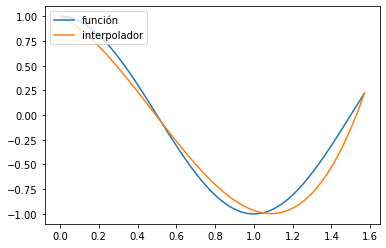

In [ ]:
def g(x):
  return(np.cos(math.pi*x))

# Interpolamos y graficamos
n=4
a=0
b=math.pi/2
xi = np.linspace(a,b,n)
yi = g(xi)
c = np.polyfit(xi, yi, n-1)
p = np.poly1d(c)
x = np.linspace(a, b, 1001)
y = g(x)
plt.plot(x, g(x),label='función')  # La función original
plt.plot(x, p(x),label='interpolador')  # El polinomio interpolador
plt.legend(loc='upper left')

In [ ]:
error_g = abs(g(x)-p(x))
print('Error max:',max(error_g))

Otro Ejemplo: estimar el error que se comete al interpolar $\frac{1}{1+25x^2}$ en el intervalo $[-1, 1]$ en 5 puntos equiespaciados.

In [ ]:
# Definimos primero la función pedida
def f(x):
    return(1/(1+25*x**2))

print(f(0.5))

0.13793103448275862


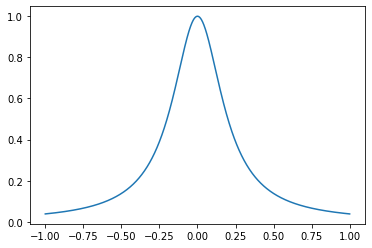

In [ ]:
# Graficamos la función
x = np.linspace(-1, 1, 1001)
y = f(x)
plt.plot(x, y)

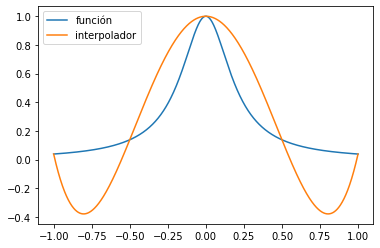

In [ ]:
# Interpolamos y graficamos
xi = np.linspace(-1, 1, 5)
yi = f(xi)
c = np.polyfit(xi, yi, 4)
#print(c)
p = np.poly1d(c)
#print(p)
plt.plot(x, f(x),label='función')  # La función original
plt.plot(x, p(x),label='interpolador')  # El polinomio interpolador
plt.legend(loc='upper left')

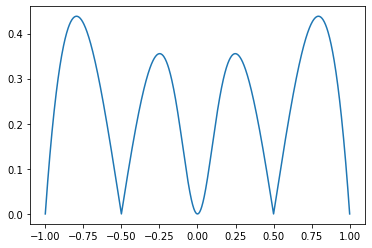

In [ ]:
# Graficamos la función de error: |f(x) - p(x)|
error = abs(f(x)-p(x))
plt.plot(x, error)

## **Ceros de Chebyshev**

Recordemos que los ceros de $T_n$ en $[a,b]$ vienen dados por la fórmula:
$$x_j = \frac{b-a}{2}\cos\left(\frac{(2j+1)\pi}{2n}\right)+\frac{b+a}{2}.$$

Text(0.5, 1.0, 'Interpolación con ceros de Chebychev')

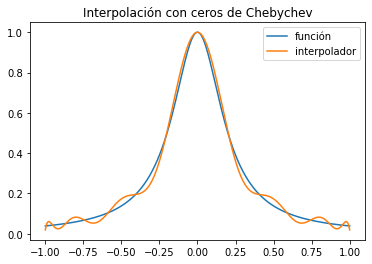

In [ ]:
n = 15
j = np.linspace(0, n-1, n) #otra forma de recorrer los puntos del 0 al 9
x_cheby = 1*(np.cos((2*j+1)*np.pi/(2*n))) + 0  #ceros de T_n en [-1,1]# Buscamos las raíces del polinomio
y_cheby = f(x_cheby)
c_cheby = np.polyfit(x_cheby, y_cheby, n-1) #coeficientes
p_cheby = np.poly1d(c_cheby) #polinomio
plt.plot(x, f(x),label='función')  # La función original
plt.plot(x, p_cheby(x),label='interpolador')  # El polinomio interpolador
plt.legend(loc='upper right')
plt.title("Interpolación con ceros de Chebychev")

Error máximo:  0.046602072111951165


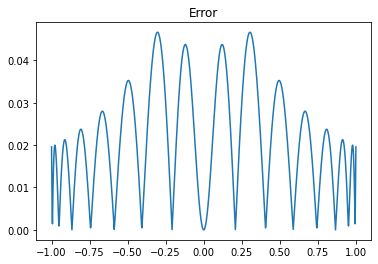

In [ ]:
# Graficamos la función de error: |f(x) - p(x)|
err2 = abs(f(x)-p_cheby(x))
plt.plot(x, err2)
plt.title("Error")
print("Error máximo: ", max(err2))

## **Forma de Lagrange del polinomio interpolador**


- Recordemos la definición de los polinomios interpoladores de Lagrange:

Dados los puntos $x_0,x,x_1,...x_n$ los polinomios interpoladores son:

$$
\ell _{j}(x):={\frac {(x-x_{0})}{(x_{j}-x_{0})}}\cdots {\frac {(x-x_{j-1})}{(x_{j}-x_{j-1})}}{\frac {(x-x_{j+1})}{(x_{j}-x_{j+1})}}\cdots {\frac {(x-x_{n})}{(x_{j}-x_{n})}}=\frac{\prod_{k\neq j}(x-x_k)}{\prod_{k\neq j}(x_j-x_k)}
$$

- Y luego para construir el interpolador de $f$: $$
P_n(x):=\sum _{j=0}^n f(x_j).\ell _{j}(x)
$$

Construimos los polinomios de Lagrange para 8 puntos equiespaciados en el $[-1, 1]$

       7         6         5         4        3         2
26.81 x + 11.49 x - 41.03 x - 17.59 x + 14.5 x + 6.216 x - 0.2791 x - 0.1196


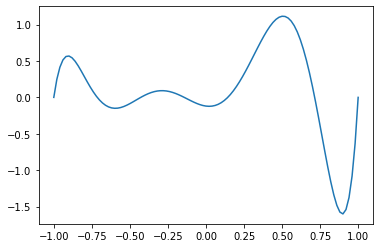

In [ ]:
j = 5
n = 8
xi = np.linspace(-1, 1, n)
#recuerdo
#print(xi)
#print(xi[2])

p = np.poly1d([1]) #polinomio p(x)=1
for k in range(0, n):
    if (k != j):  #condicional
        p = p * np.poly1d([xi[k]], True) / (xi[j]-xi[k])

print(p)
x = np.linspace(-1, 1, 101)
plt.plot(x, p(x))

## **Interpolación Usando el comando `polyfit`**

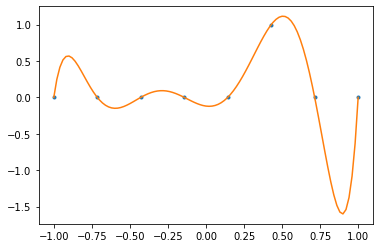

In [ ]:
j = 5
n = 8
xi = np.linspace(-1, 1, n)
yi = np.zeros(8)
yi[j] = 1
c = np.polyfit(xi, yi, 7)
p = np.poly1d(c)
x = np.linspace(-1, 1, 101)
y = p(x)
plt.plot(xi, yi, '.')
plt.plot(x, y)

**Ejercicio:** Escribir una función que reciba $x_{min}$, $x_{max}$, $n$, $j$ y grafique el $j$-esimo polinomio de Lagrange en $n$ puntos equiespaciados en el intervalo $[x_{min}, x_{max}]$.

In [ ]:
def graf_lagrange(x_min,x_max,n,j):
  #
  #
  #
  #

# **Interpolación de Hermite**

Hallar el polinomio de grado menor o igual a 4 que verifique $$p(0)=0, \ p(1)=2, \ p(3)=1, \ p'(3)=0, \ p''(3)=4.$$


El polinomio debe ser de la siguiente forma: $p(x)=a_4x^4+a_3x^3+a_2x^2+a_1x+a_0$
1.   $p(0)=a_0=0$
2.   $p(1)=a_4+a_3+a_2+a_1+a_0=2$
3.   $p(3)=81a_4+27a_3+9a_2+3a_1+a_0=1$
4.   $p'(3)=108a_4+27a_3+6a_2+a_1=0$
5.   $p''(3)=108a_4+18a_3+2a_2=4$

\begin{equation}
  \left(\begin{array}{rrrrr|r}
    0 & 0 & 0 & 0 & 1 & 0\\
    1 & 1 & 1 & 1 & 1 & 2\\
    81 & 27 & 9 & 3 & 1 & 1\\
    108 & 27 & 6 & 1 & 0 & 0\\
    108 & 18 & 2 & 0 & 0 & 4
  \end{array}
  \right)
\end{equation}

In [ ]:
A=np.array([[0,0,0,0,1],[1,1,1,1,1],[81,27,9,3,1],[108,27,6,1,0],[108,18,2,0,0]])
b=np.array([0,2,1,0,4])
#Ax=b
print('det(A)=',np.linalg.det(A))

c = np.linalg.solve(A, b) #resuelve el sistema. Devuelve los coeficientes de P

print('coeficientes de p: ',c)

det(A)= 432.00000000000057
coeficientes de p:  [ 0.1712963  -0.83796296  0.29166667  2.375       0.        ]


Verifiquemos si cumple lo pedido

In [ ]:
p = np.poly1d(c)
print(p)
dp = np.polyder(p)
print(dp)
print("p(0): ",p(0))
print("p(1): ",p(1))
print("p(3): ",p(3))
print("p'(3): ",dp(3))
dp2 = np.polyder(dp)
print("p''(3): ",dp2(3))

        4         3          2
0.1713 x - 0.838 x + 0.2917 x + 2.375 x
        3         2
0.6852 x - 2.514 x + 0.5833 x + 2.375
p(0):  0.0
p(1):  2.0
p(3):  0.9999999999999991
p'(3):  -1.3322676295501878e-15
p''(3):  4.000000000000001


In [ ]:
x=np.linspace(-10,10,101)
y=p(x)
plt.plot(x,y)

# **Splines Lineales**

Interpolamos en cada intervalo $[x_i, x_{i+1}]$ por un polinomio de grado
1, para $i = 0,..., n − 1$.

Ejemplo: construir esos interpoladores para $f(x) = \frac{1}{1+25x^2}$ tomando $n$ puntos equiespaciados en el intervalo $[-1,1]$.

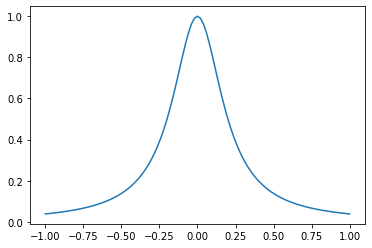

In [ ]:
# Definimos primero la función
def f(x):
    return(1/(1+25*x**2))

n = 5
x = np.linspace(-1,1,101)
plt.plot(x,f(x))

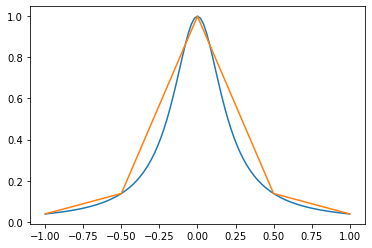

In [ ]:
from scipy import interpolate
 
n = 5  #cantidad de puntos equiespaciados
xi = np.linspace(-1,1,n)
yi = f(xi)
p = interpolate.interp1d(xi, yi)  # Interpolación lineal a trozos

plt.plot(x, f(x))
plt.plot(x, p(x))

¿Qué sucede si cambiamos el valor de $n$?

**Ejercicio:** Hacer un programita que recorra los valores de $n$ desde 1 a 10 y grafique en el mismo gráfico los distintos interpolantes.

# **Splines Cúbicos**

Consideremos ahora la siguiente función: $f(x)=e^{(\cos(\pi x)+1)^2}$ en varios nodos del intervalo $[0,8]$

**Recuerdo:** $$$$
Interpolamos en cada intervalo $[x_i, x_{i+1}]$ por un polinomio $p_i$ de
grado 3. De forma tal que


*   $p_i(x_i) = y_i$, $p_i(x_{i+1}) = y_{i+1}$, para $i = 0,..., n − 1$;
*   $p'_i(x_{i+1}) = p'_{i+1}(x_{i+1})$, para $i = 0,..., n − 2$;
*   $p''_i(x_{i+1}) = p''_{i+1}(x_{i+1})$, para $i = 0,..., n − 2$;

Cada $p_i$ tiene 4 coeficientes. Hay que hallar, entonces, $4n$ coeficientes. Sin embargo, hasta acá planteamos solo $2n + (n − 1) + (n − 1) = 4n − 2$ restricciones.


In [ ]:
#Definir una función que haga de f(x)

def f(x):
  return(np.exp((np.cos(np.pi*x)+1)**2))

print(f(0))

54.598150033144236


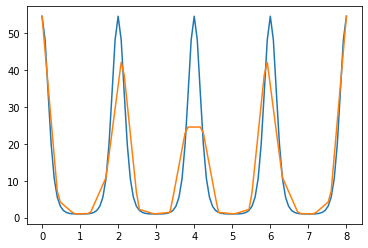

In [ ]:
#Graficar la función en el intervalo pedido

x=np.linspace(0,8,101)
#completar
from scipy import interpolate
 
n = 20  #cantidad de puntos equiespaciados
xi = np.linspace(0,8,n)
yi = f(xi)
p = interpolate.interp1d(xi, yi)  # Interpolación lineal a trozos

plt.plot(x, f(x))
plt.plot(x, p(x))

Antes de buscar un spline, interpolemos la función en los nodos de Tchebychev para varios valores de $n$. Recordemos que los ceros de $T_n$ en $[0,8]$ vienen dados por la fórmula
$$x_j = \frac{8-0}{2}\cos\left(\frac{(2j+1)\pi}{2n}\right)+\frac{8+0}{2}=4\cos\left(\frac{(2j+1)\pi}{2n}\right)+4.$$

In [ ]:
n = 100
j = np.linspace(0, n-1, n)
#............. definir los ceros de T_n en [0,8]

# armar el polinomio con polyfit y poly1d

#graficar la función y el polinomio resultante

Ahora si comencemos con los splines

In [ ]:
#Primero calcular el spline lineal como en el primer ejemplo
#considerar un valor de n alto
 

## **Condiciones de borde**


*   `not-a-knot` (default). Solo sirve para cuando hay 3 o más intervalos.
*   `periodic:` Si se asume que la función original es periódica, de período $x_n − x_0$. Entonces $y_0 = y_n$ y vale que $p'_0(x_0) = p'_{n−1}(x_n)$ y $p''_
0(x_0) = p''_{n−1}(x_n)$.
*    `clamped:` $p'_0(x_0) = p'_{n−1}(x_n) = 0$.
*    `natural:` $p''_0(x_0) = p''_{n−1}(x_n) = 0$.


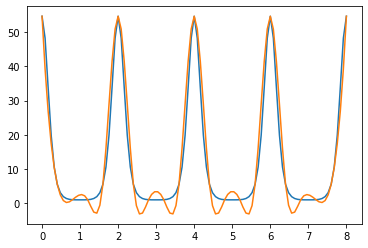

In [ ]:
#Ejemplo
from scipy import interpolate

n = 20
xi = np.linspace(0, 8, n+1)
p = interpolate.interp1d(xi, f(xi), kind = "cubic")
x=np.linspace(0,8,101)
plt.plot(x, f(x))
plt.plot(x, p(x))

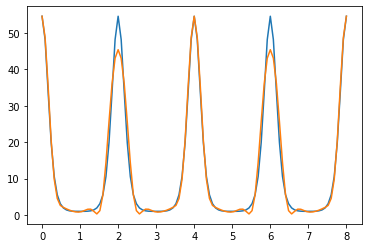

In [ ]:
# Tambien puedo usar "cubicSpline" que tiene más opciones
p = interpolate.CubicSpline(xi, f(xi),bc_type = "periodic")
plt.plot(x, f(x))
plt.plot(x, p(x))

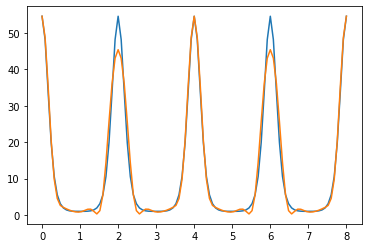

In [ ]:
n = 30
xi = np.linspace(0, 8, n+1)
yi = f(xi)
p = interpolate.CubicSpline(xi, yi, bc_type = "clamped") #derivada primera = 0 en los bordes
plt.plot(x, f(x))
plt.plot(x, p(x))

In [ ]:
#replicar lo anterior para bc_type = "periodic" y bc_type = "natural"

# **Integración numérica: regla de los trapecios**

Sabemos por ejemplo que $\int_0^1 \cos(x)=\sin(1)$

In [ ]:
def w(x):
  y=np.cos(x)
  return(y)

from scipy import integrate

N= 30
x=np.linspace(0,1,N)
I=integrate.trapz(w(x),x)
print("Valor de la integral:",np.sin(1))
print("Aproximación por trapecios:",I)
print("Error:",abs(I-np.sin(1)))

Valor de la integral: 0.8414709848078965
Aproximación por trapecios: 0.8413876031529935
Error: 8.338165490295868e-05


**Ejercicio:** Aproximar $\int_{-8}^1\cos(e^x)~dx$ usando la regla de los trapecios.

In [ ]:
#Definir la función f(x)=cos(e^x) y hacer el grafico en el intervalo [-8,1]
def h(x):
  y=np.cos(np.exp(x))
  return(y)

print(h(0))  

0.5403023058681398


In [ ]:
from scipy import integrate

In [ ]:
N = 20 #completar con cantidad de puntos
x = np.linspace(-8,1,N)  #completar
I = integrate.trapz(h(x),x)
print(I)

7.61388977853631


**Ejercicio:** Si quiero que el error cometido sea $\leq 10^{-4}$, como debo tomar $n$. Calular para alguno de los valores el resultado aproximado de la integral. $$$$
Recuerdo: $$|I-T_n|\leq\frac{\max|f''(\xi)|}{12}\frac{(b-a)^3}{n^2}$$


**Ejercicio**: Implementar un programa que use la formula de integración $$I\cong T_n=\frac{(b-a)}{2n}(f(x_0)+2f(x_1)+...+2f(x_{n-1})+f(x_n))$$